In 1963, Edward Lorenz developed a simple mathematical model of the way air moves around in the atmosphere. His model was a system of three ordinary differential equations that demonstrate deterministic chaos at certain parameter values and initial conditions. The Lorenz attractor is the system's strange attractor that resembles a butterfly when visualized. The Lorenz system is nonlinear, three-dimensional, and deterministic. The Lorenz attractor is a set of chaotic solutions of the Lorenz system and is possibly the most famous depiction of a system that exibits chaotic behavior. Very slight changes to the initial conditions of the system lead to wildly different solutions. The system itself describes the movement of a point in a three-dimensional space over time. The system is formally described by three ordinary differential equations that represent the movement of this point (x, y, z). In these equations, t represents time and sigma, rho, and beta are constant system parameters.

$$\displaystyle{ \frac{dx}{dt} = \delta(y-x) \\
                 \frac{dy}{dt} = x(\rho-z)-y \\ 
                 \frac{dz}{dt} = xy-{\beta z}}$$ 

For his famous depiction of chaos, Lorenz used the values sigma = 10, beta = 8/3 and rho = 28. With these parameter values, the system exhibits deterministic chaos. It has a strange attractor with a fractal structure.

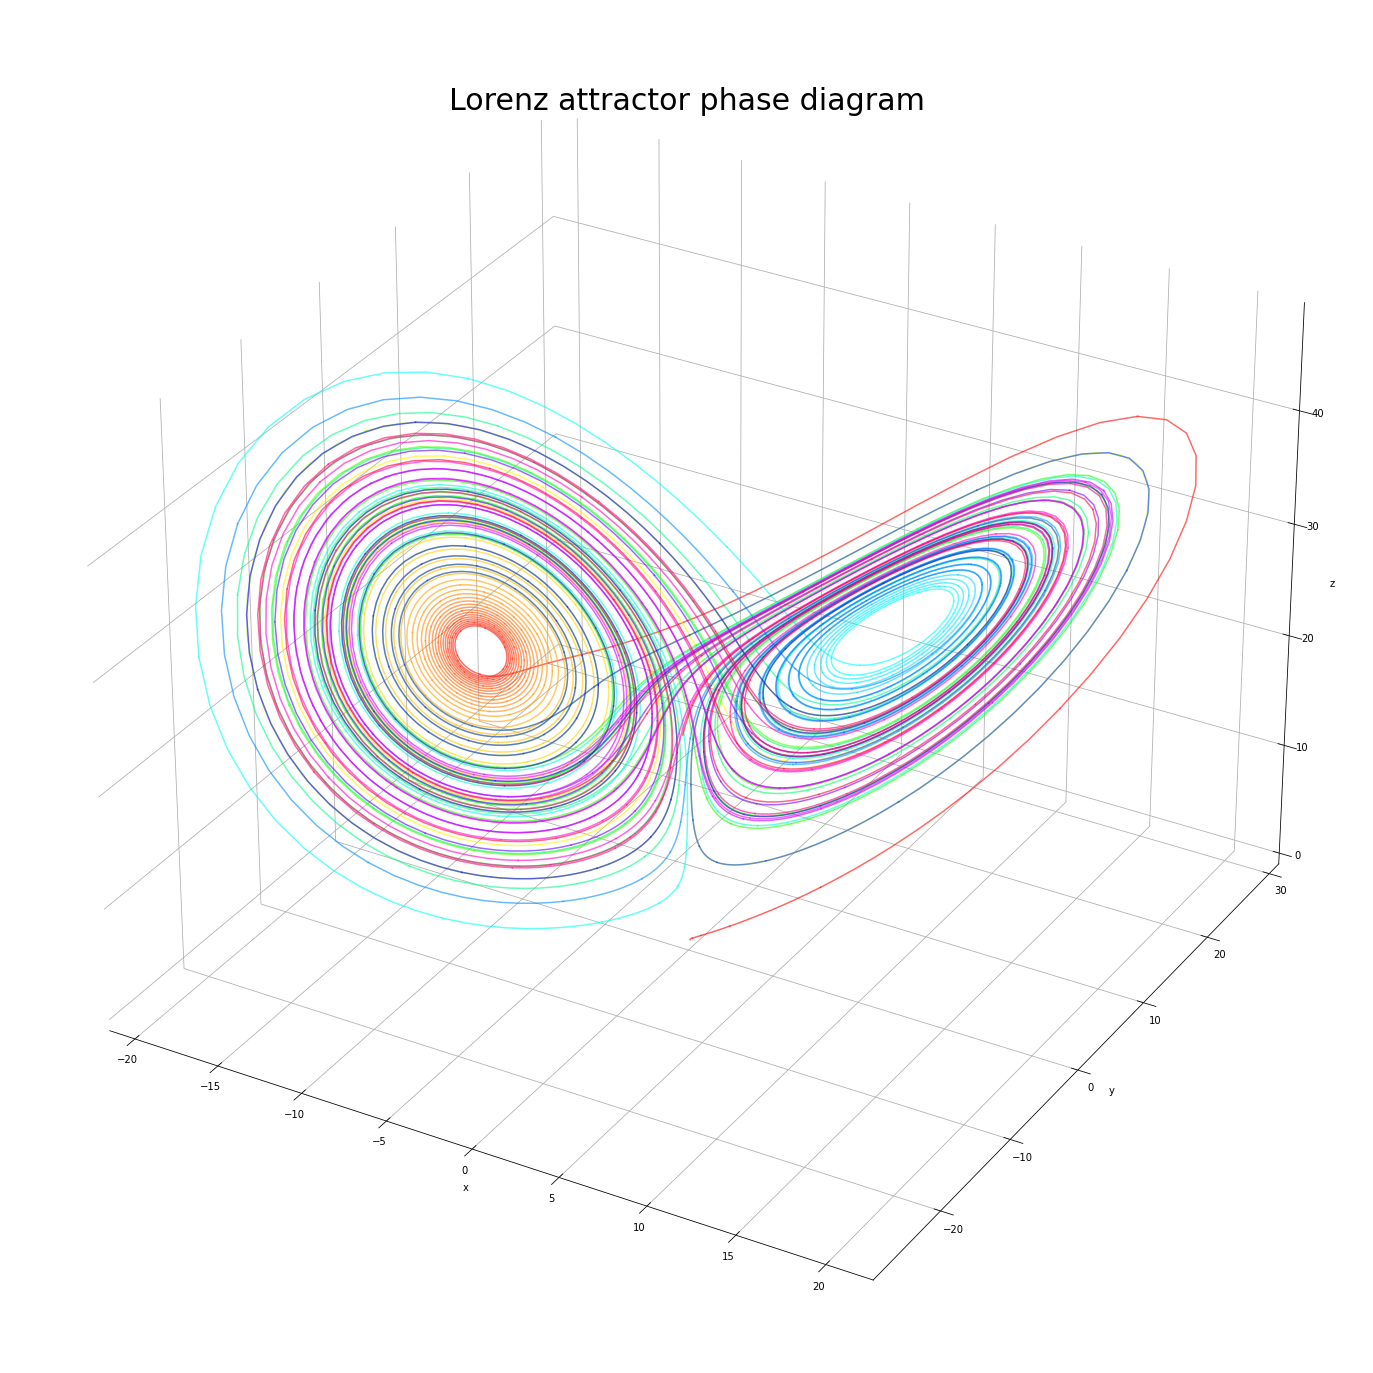

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D

# define the initial system state (aka x, y, z positions in space)
initial_state = [0.1, 0, 0]

# define the system parameters sigma, rho, and beta
sigma = 10.
rho   = 28.
beta  = 8./3.

# define the time points to solve for, evenly spaced between the start and end times
start_time = 0
end_time = 100
time_points = np.linspace(start_time, end_time, end_time*100)

# define the lorenz system
# x, y, and z make up the system state, t is time, and sigma, rho, beta are the system parameters
def lorenz_system(current_state, t):
    
    # positions of x, y, z in space at the current time point
    x, y, z = current_state
    
    # define the 3 ordinary differential equations known as the lorenz equations
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    
    # return a list of the equations that describe the system
    return [dx_dt, dy_dt, dz_dt]

xyz = odeint(lorenz_system, initial_state, time_points)

# extract the individual arrays of x, y, and z values from the array of arrays
x = xyz[:, 0]
y = xyz[:, 1]
z = xyz[:, 2]

# plot the lorenz attractor in three-dimensional phase space
fig = plt.figure(figsize=(25,25))
ax = plt.axes(projection='3d')
ax.xaxis.set_pane_color((1,1,1,1))
ax.yaxis.set_pane_color((1,1,1,1))
ax.zaxis.set_pane_color((1,1,1,1))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
s = 10
n = 10000
for i in range(0,n-s,s):
    ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=plt.cm.hsv((i+1)/n), alpha=0.6)
ax.set_title('Lorenz attractor phase diagram', fontsize=30,y=0.9999)
plt.show()

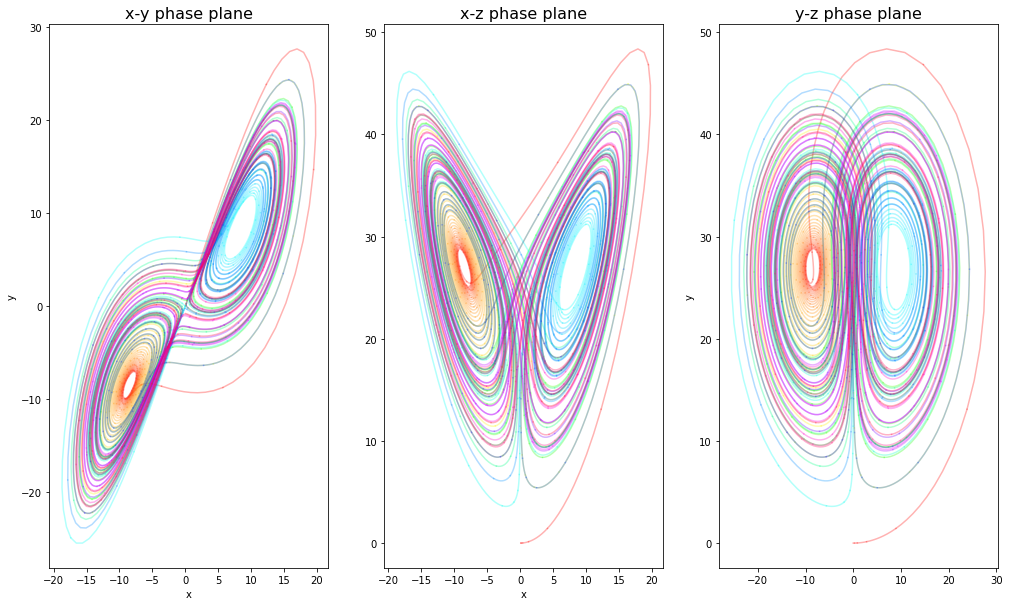

In [2]:
# now plot two-dimensional cuts of the three-dimensional phase space
fig, ax = plt.subplots(1,3, sharex=False, sharey=False, figsize=(17, 10))

s = 10
n = 10000
for i in range(0,n-s,s):

    # plot the x values vs the y values
    ax[0].plot(x[i:i+s+1], y[i:i+s+1], color=plt.cm.hsv((i+1)/n), alpha=0.3)
    ax[0].set_title('x-y phase plane', fontsize=16)
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')

    # plot the x values vs the z values
    ax[1].plot(x[i:i+s+1], z[i:i+s+1], color=plt.cm.hsv((i+1)/n), alpha=0.3)
    ax[1].set_title('x-z phase plane', fontsize=16)
    ax[1].set_xlabel('x')

    # plot the y values vs the z values
    ax[2].plot(y[i:i+s+1], z[i:i+s+1], color=plt.cm.hsv((i+1)/n), alpha=0.3)
    ax[2].set_title('y-z phase plane', fontsize=16)
    ax[2].set_ylabel('y')

plt.show()

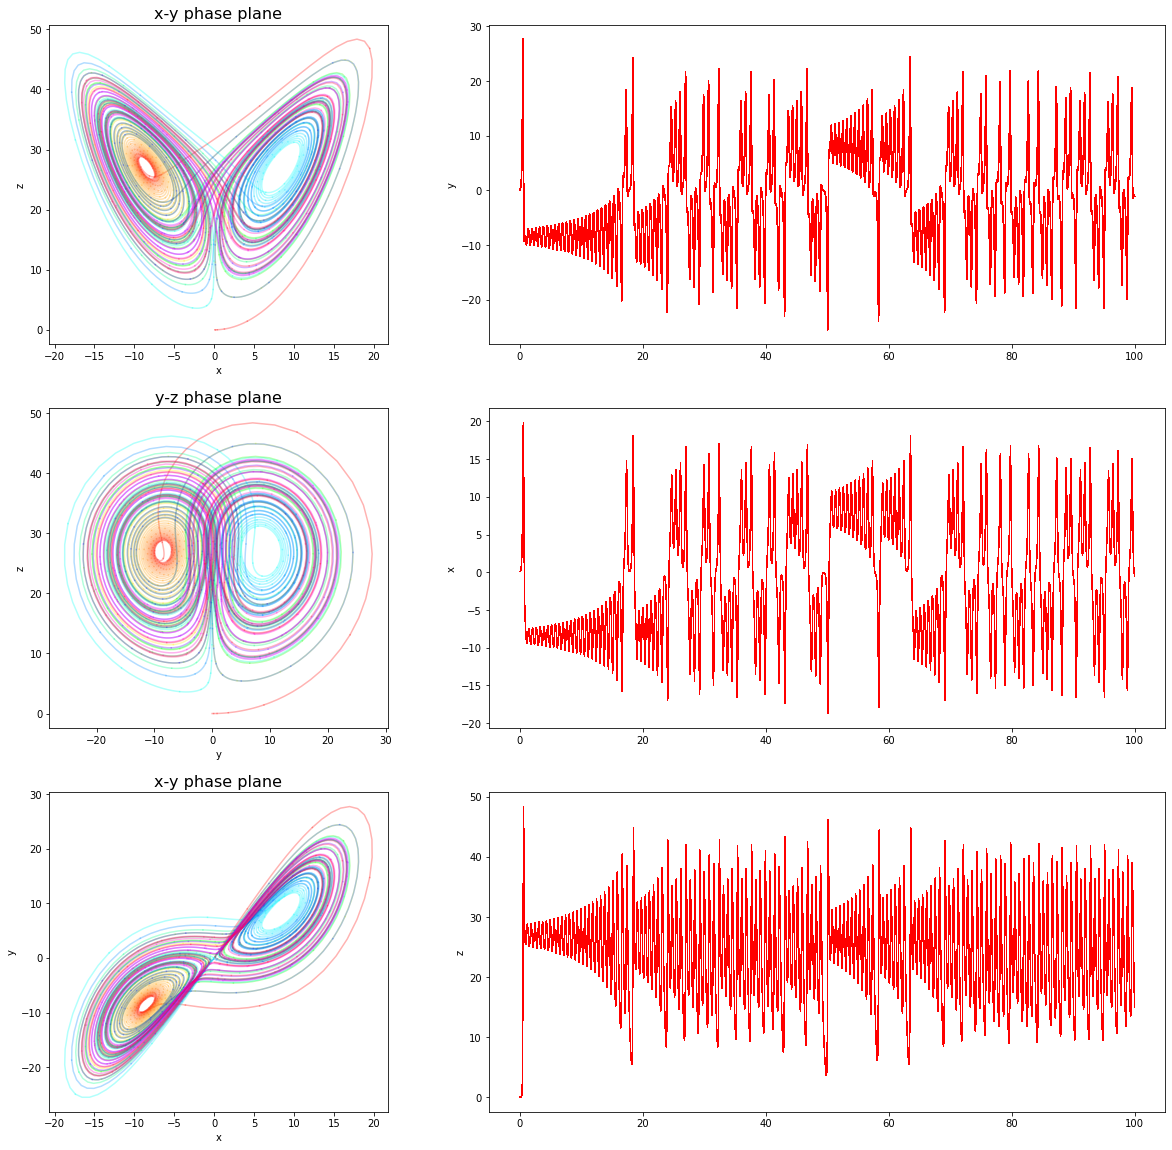

In [3]:
fig, ax = plt.subplots(3,2, sharex=False, sharey=False, figsize=(20, 20), gridspec_kw={'width_ratios': [1,2]})

s = 10
n = 10000
for i in range(0,n-s,s):

    # plot the x values vs the y values
    ax[0][0].plot(x[i:i+s+1], z[i:i+s+1], color=plt.cm.hsv((i+1)/n), alpha=0.3)
    ax[0][0].set_title('x-y phase plane', fontsize=16)
    ax[0][0].set_xlabel('x')
    ax[0][0].set_ylabel('z')
    # plot the y values vs time values
    ax[0][1].plot(time_points,y,'r', linewidth=0.7)
    ax[0][1].set_ylabel('y')
    # plot the x values vs the y values
    ax[1][0].plot(y[i:i+s+1], z[i:i+s+1], color=plt.cm.hsv((i+1)/n), alpha=0.3)
    ax[1][0].set_title('y-z phase plane', fontsize=16)
    ax[1][0].set_xlabel('y')
    ax[1][0].set_ylabel('z')
    # plot the y values vs time values
    ax[1][1].plot(time_points,x,'r', linewidth=0.5)
    ax[1][1].set_ylabel('x')
    # plot the x values vs the y values
    ax[2][0].plot(x[i:i+s+1], y[i:i+s+1], color=plt.cm.hsv((i+1)/n), alpha=0.3)
    ax[2][0].set_title('x-y phase plane', fontsize=16)
    ax[2][0].set_xlabel('x')
    ax[2][0].set_ylabel('y')
    # plot the y values vs time values
    ax[2][1].plot(time_points,z,'r', linewidth=0.5)
    ax[2][1].set_ylabel('z')
plt.show()

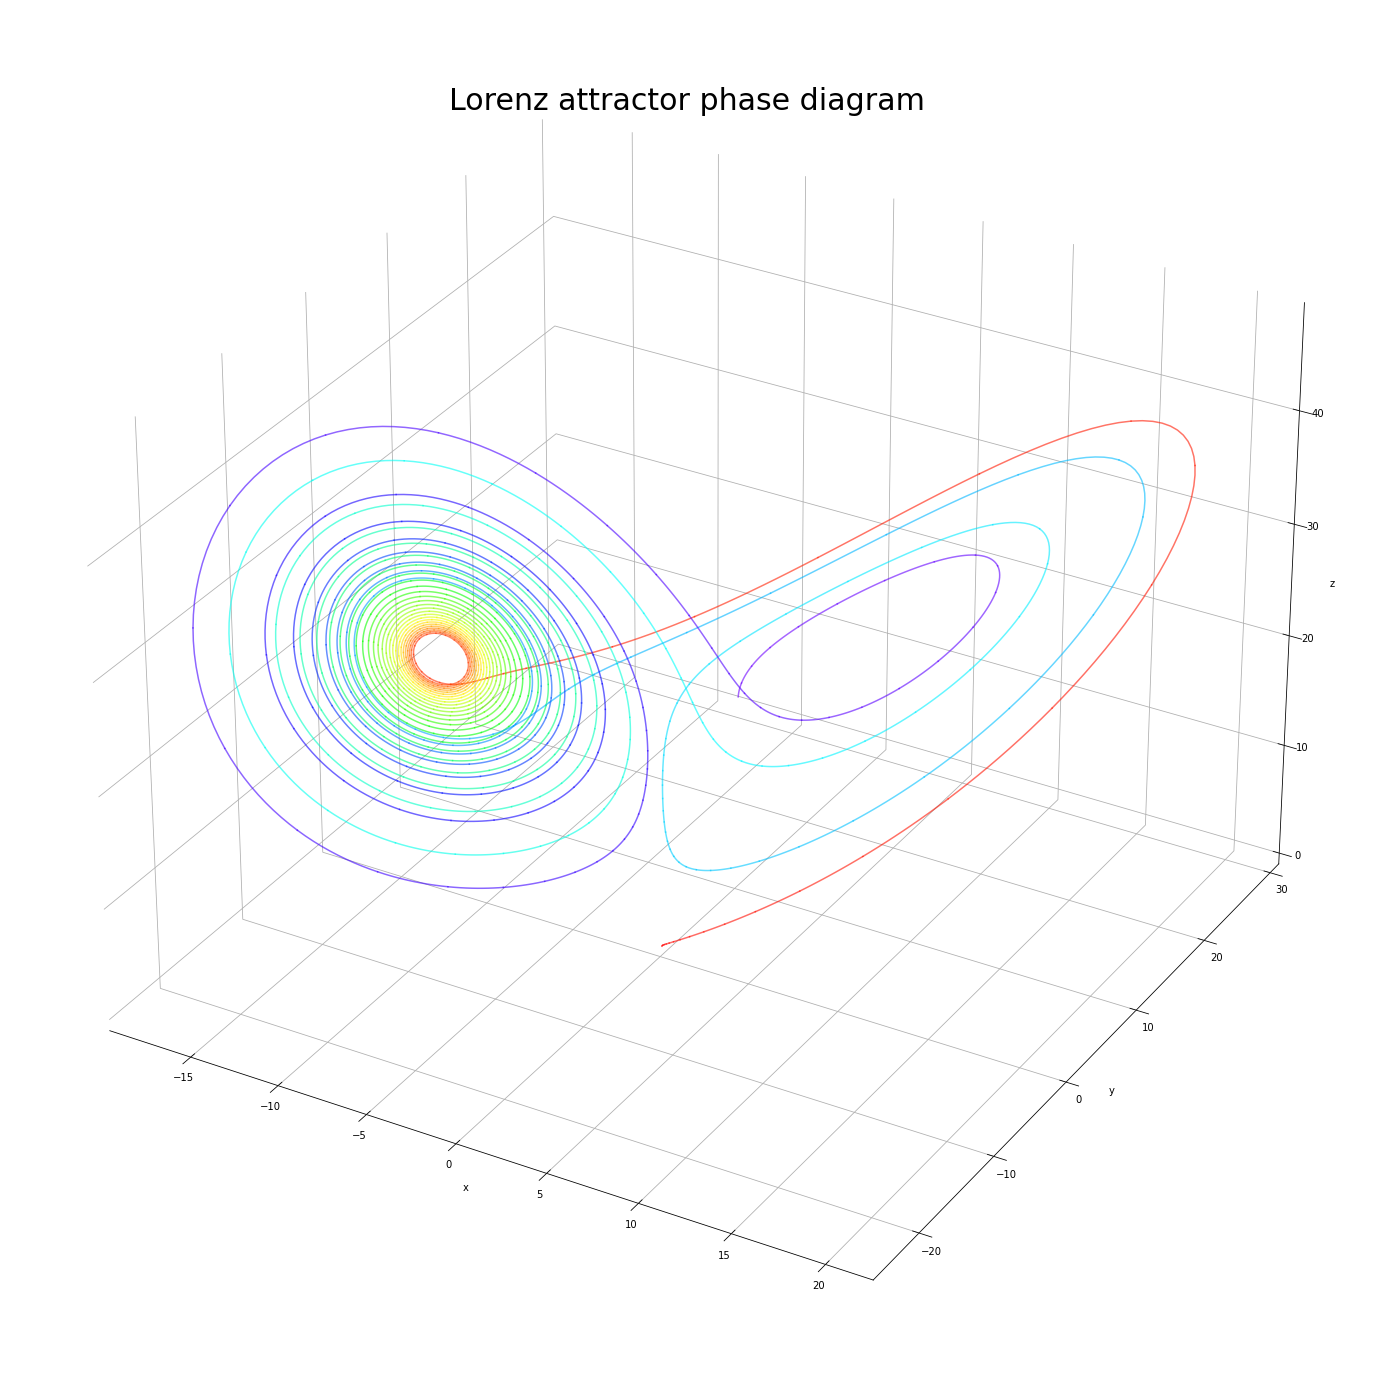

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D

# define the initial system state (aka x, y, z positions in space)
initial_state = [0.1, 0, 0]

# define the system parameters sigma, rho, and beta
sigma = 10.
rho   = 28.
beta  = 8./3.

# define the time points to solve for, evenly spaced between the start and end times
start_time = 0
end_time = 25
time_points = np.linspace(start_time, end_time, end_time*300)

# define the lorenz system
# x, y, and z make up the system state, t is time, and sigma, rho, beta are the system parameters
def lorenz_system(current_state, t):
    
    # positions of x, y, z in space at the current time point
    x, y, z = current_state
    
    # define the 3 ordinary differential equations known as the lorenz equations
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    
    # return a list of the equations that describe the system
    return [dx_dt, dy_dt, dz_dt]

xyz = odeint(lorenz_system, initial_state, time_points)

# extract the individual arrays of x, y, and z values from the array of arrays
x = xyz[:, 0]
y = xyz[:, 1]
z = xyz[:, 2]

# plot the lorenz attractor in three-dimensional phase space
fig = plt.figure(figsize=(25,25))
ax = plt.axes(projection='3d')
ax.xaxis.set_pane_color((1,1,1,1))
ax.yaxis.set_pane_color((1,1,1,1))
ax.zaxis.set_pane_color((1,1,1,1))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
s = 10
n = 10000
for i in range(0,n-s,s):
    ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=plt.cm.hsv((i+1)/n), alpha=0.6)
ax.set_title('Lorenz attractor phase diagram', fontsize=30,y=0.9999)
plt.show()

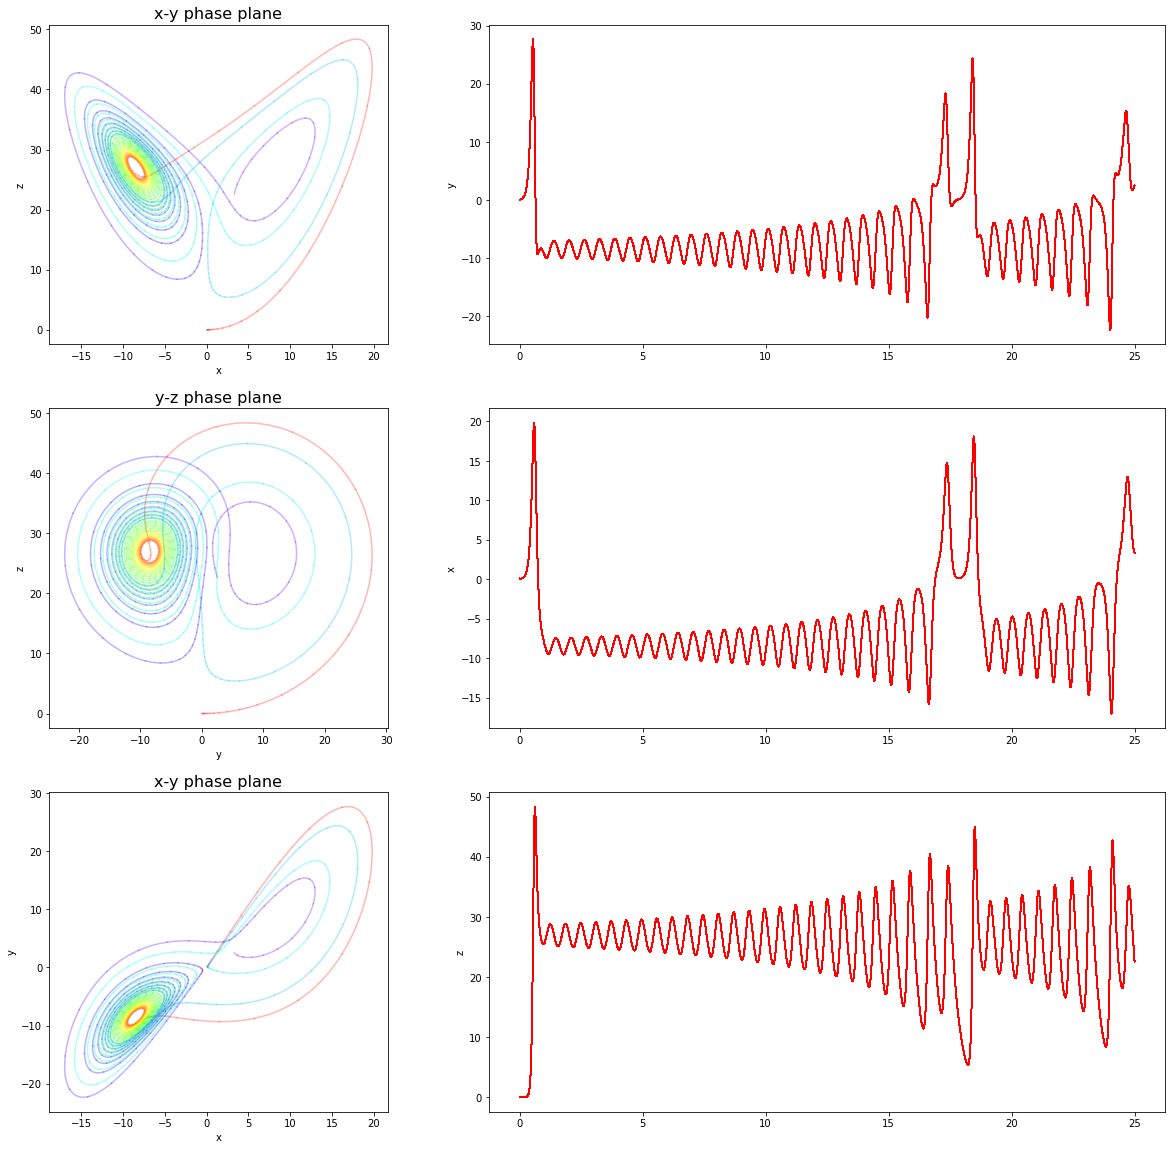

In [3]:
fig, ax = plt.subplots(3,2, sharex=False, sharey=False, figsize=(20, 20), gridspec_kw={'width_ratios': [1,2]})

s = 10
n = 10000
for i in range(0,n-s,s):

    # plot the x values vs the y values
    ax[0][0].plot(x[i:i+s+1], z[i:i+s+1], color=plt.cm.hsv((i+1)/n), alpha=0.3)
    ax[0][0].set_title('x-y phase plane', fontsize=16)
    ax[0][0].set_xlabel('x')
    ax[0][0].set_ylabel('z')
    # plot the y values vs time values
    ax[0][1].plot(time_points,y,'r', linewidth=1)
    ax[0][1].set_ylabel('y')
    # plot the x values vs the y values
    ax[1][0].plot(y[i:i+s+1], z[i:i+s+1], color=plt.cm.hsv((i+1)/n), alpha=0.3)
    ax[1][0].set_title('y-z phase plane', fontsize=16)
    ax[1][0].set_xlabel('y')
    ax[1][0].set_ylabel('z')
    # plot the y values vs time values
    ax[1][1].plot(time_points,x,'r', linewidth=1)
    ax[1][1].set_ylabel('x')
    # plot the x values vs the y values
    ax[2][0].plot(x[i:i+s+1], y[i:i+s+1], color=plt.cm.hsv((i+1)/n), alpha=0.3)
    ax[2][0].set_title('x-y phase plane', fontsize=16)
    ax[2][0].set_xlabel('x')
    ax[2][0].set_ylabel('y')
    # plot the y values vs time values
    ax[2][1].plot(time_points,z,'r', linewidth=1)
    ax[2][1].set_ylabel('z')
plt.show()

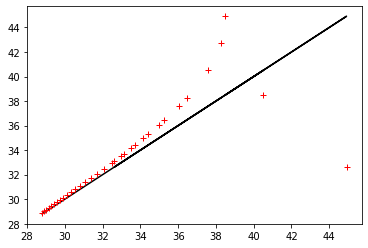

In [7]:
def FindMaxima(numbers):
    maxima = []
    length = len(numbers)
    if length >= 2:
        if numbers[0] > numbers[1]:
              maxima.append(numbers[0])

    if length > 3:
        for i in range(1, length-1):     
            if numbers[i] > numbers[i-1] and numbers[i] > numbers[i+1]:
                maxima.append(numbers[i])
    
    if numbers[length-1] > numbers[length-2]:    
        maxima.append(numbers[length-1])        
    return maxima

zmax2 = FindMaxima(z)
plt.plot(zmax2[1:-2],zmax2[1:-2],'k-')
plt.plot(zmax2[1:-2],zmax2[2:-1],'r+')


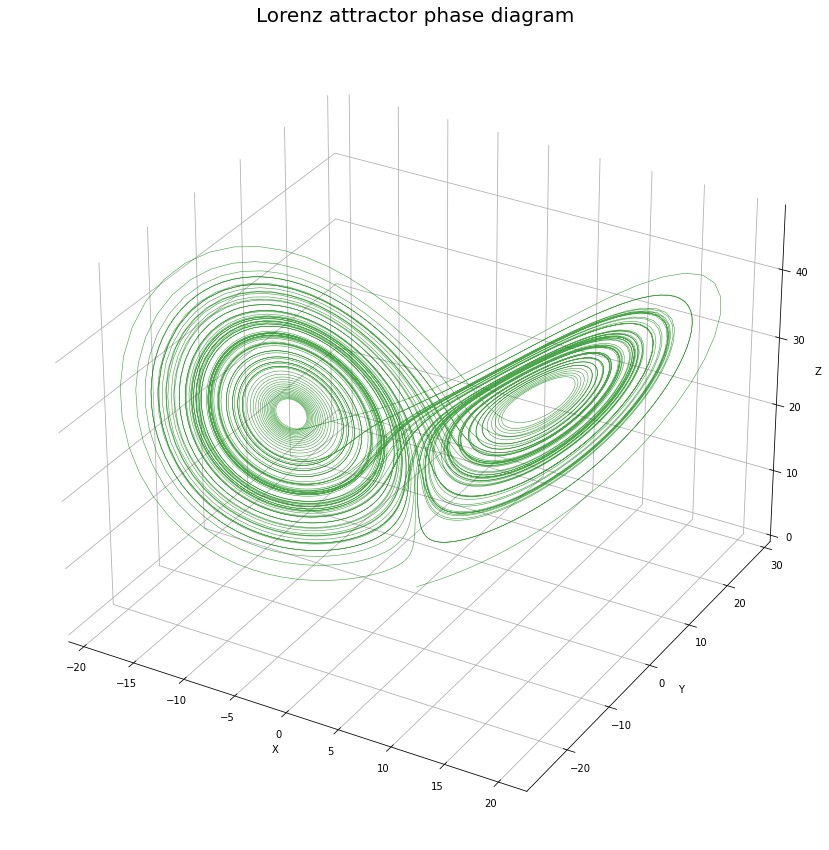

In [41]:
import numpy as np, matplotlib.pyplot as plt, matplotlib.font_manager as fm, os
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D

    
# define the initial system state (aka x, y, z positions in space)
initial_state = [0.1, 0, 0]

# define the system parameters sigma, rho, and beta
sigma = 10.
rho   = 28.
beta  = 8./3.

# define the time points to solve for, evenly spaced between the start and end times
start_time = 0
end_time = 100
time_points = np.linspace(start_time, end_time, end_time*100)

# define the lorenz system
# x, y, and z make up the system state, t is time, and sigma, rho, beta are the system parameters
def lorenz_system(current_state, t):
    
    # positions of x, y, z in space at the current time point
    x, y, z = current_state
    
    # define the 3 ordinary differential equations known as the lorenz equations
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    
    # return a list of the equations that describe the system
    return [dx_dt, dy_dt, dz_dt]

xyz = odeint(lorenz_system, initial_state, time_points)

# extract the individual arrays of x, y, and z values from the array of arrays
x = xyz[:, 0]
y = xyz[:, 1]
z = xyz[:, 2]

# plot the lorenz attractor in three-dimensional phase space
fig = plt.figure(figsize=(25,15))
ax = plt.axes(projection='3d')
ax.xaxis.set_pane_color((1,1,1,1))
ax.yaxis.set_pane_color((1,1,1,1))
ax.zaxis.set_pane_color((1,1,1,1))
ax.plot(x, y, z, color='g', alpha=0.7, linewidth=0.6)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title('Lorenz attractor phase diagram', fontsize=20)
plt.show()

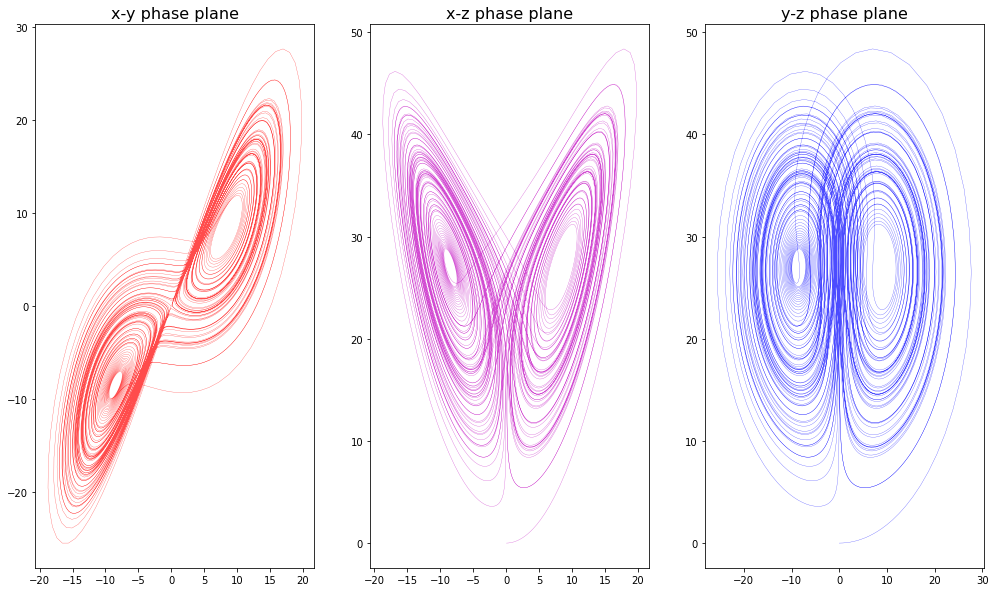

In [42]:
# now plot two-dimensional cuts of the three-dimensional phase space
fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(17, 10))

# plot the x values vs the y values
ax[0].plot(x, y, color='r', alpha=0.7, linewidth=0.3)
ax[0].set_title('x-y phase plane', fontsize=16)

# plot the x values vs the z values
ax[1].plot(x, z, color='m', alpha=0.7, linewidth=0.3)
ax[1].set_title('x-z phase plane', fontsize=16)

# plot the y values vs the z values
ax[2].plot(y, z, color='b', alpha=0.7, linewidth=0.3)
ax[2].set_title('y-z phase plane', fontsize=16)

plt.show()

# Animated Plot 

In [1]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, glob, os
import IPython.display as IPdisplay, matplotlib.font_manager as fm
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D
from PIL import Image

# define the fonts to use for plots
family = 'Myriad Pro'
title_font = fm.FontProperties(family=family, style='normal', size=20, weight='normal', stretch='normal')

save_folder = 'images/lorenz-animate'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)
    
# define the initial system state (aka x, y, z positions in space)
initial_state = [0.1, 0, 0]

# define the system parameters sigma, rho, and beta
sigma = 10.
rho   = 28.
beta  = 8./3.

# define the time points to solve for, evenly spaced between the start and end times
start_time = 1
end_time = 60
interval = 100
time_points = np.linspace(start_time, end_time, end_time * interval)

# define the lorenz system
def lorenz_system(current_state, t):
    x, y, z = current_state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

# plot the system in 3 dimensions
def plot_lorenz(xyz, n):
    fig = plt.figure(figsize=(12, 9))
    ax = plt.axes(projection='3d')
    ax.xaxis.set_pane_color((1,1,1,1))
    ax.yaxis.set_pane_color((1,1,1,1))
    ax.zaxis.set_pane_color((1,1,1,1))
    x = xyz[:, 0]
    y = xyz[:, 1]
    z = xyz[:, 2]
    #ax.plot(x, y, z, color=plt.cm.hsv((i+1)/n), alpha=0.7, linewidth=0.7)
    s = 10
    n1 = 10000
    for i in range(0,n1-s,s):
        ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=plt.cm.hsv((i+1)/n1), alpha=0.6)
    ax.set_xlim((-30,30))
    ax.set_ylim((-30,30))
    ax.set_zlim((0,50))
    ax.set_title('Lorenz system attractor', fontproperties=title_font)
    
    plt.savefig('{}/{:03d}.png'.format(save_folder, n), dpi=60, bbox_inches='tight', pad_inches=0.1)
    plt.close()
    
# return a list in iteratively larger chunks
def get_chunks(full_list, size):
    size = max(1, size)
    chunks = [full_list[0:i] for i in range(1, len(full_list) + 1, size)]
    return chunks

In [17]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, glob, os
import IPython.display as IPdisplay, matplotlib.font_manager as fm
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D
from PIL import Image
plt.rcParams['animation.embed_limit'] = 2**3
plt.rc('savefig', dpi=300)

# define the fonts to use for plots
family = 'Myriad Pro'
title_font = fm.FontProperties(family=family, style='normal', size=20, weight='normal', stretch='normal')

save_folder = 'images/lorenz-animate'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)
    
# define the initial system state (aka x, y, z positions in space)
initial_state = [0.1, 0, 0]

# define the system parameters sigma, rho, and beta
sigma = 10.
rho   = 28.
beta  = 8./3.

# define the time points to solve for, evenly spaced between the start and end times
start_time = 1
end_time = 60
interval = 100
time_points = np.linspace(start_time, end_time, end_time * interval)

# define the lorenz system
def lorenz_system(current_state, t):
    x, y, z = current_state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

# plot the system in 3 dimensions
def plot_lorenz(xyz, n):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    #ax.xaxis.set_pane_color((1,1,1,1))
    #ax.yaxis.set_pane_color((1,1,1,1))
    #ax.zaxis.set_pane_color((1,1,1,1))
    x = xyz[:, 0]
    y = xyz[:, 1]
    z = xyz[:, 2]
    #ax.plot(x, y, z, color=plt.cm.hsv((i+1)/n), alpha=0.7, linewidth=0.7)
    s = 10
    n1 = 10000
    for i in range(0,n1-s,s):
        ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=plt.cm.hsv((i+1)/n1), alpha=0.6)
    ax.set_xlim((-30,30))
    ax.set_ylim((-30,30))
    ax.set_zlim((0,50))
    ax.set_title('Lorenz system attractor', fontproperties=title_font)
    
    plt.savefig('{}/{:03d}.png'.format(save_folder, n), dpi=60, bbox_inches='tight', pad_inches=0.1)
    plt.close()
    
# return a list in iteratively larger chunks
def get_chunks(full_list, size):
    size = max(1, size)
    chunks = [full_list[0:i] for i in range(1, len(full_list) + 1, size)]
    return chunks

In [18]:
# get incrementally larger chunks of the time points, to reveal the attractor one frame at a time
chunks = get_chunks(time_points, size=20)

# get the points to plot, one chunk of time steps at a time, by integrating the system of equations
points = [odeint(lorenz_system, initial_state, chunk) for chunk in chunks]

# plot each set of points, one at a time, saving each plot
for n, point in enumerate(points):
    plot_lorenz(point, n)
    
# create a tuple of display durations, one for each frame
first_last = 100 #show the first and last frames for 100 ms
standard_duration = 5 #show all other frames for 5 ms
durations = tuple([first_last] + [standard_duration] * (len(points) - 2) + [first_last])

# load all the static images into a list
images = [Image.open(image) for image in glob.glob('{}/*.png'.format(save_folder))]
gif_filepath = 'images/animated-lorenz-attractor.gif'

# save as an animated gif
gif = images[0]
gif.info['duration'] = durations #ms per frame
gif.info['loop'] = 0 #how many times to loop (0=infinite)
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:])

# verify that the number of frames in the gif equals the number of image files and durations
Image.open(gif_filepath).n_frames == len(images) == len(durations)
plt.show()

In [19]:
IPdisplay.Image(url=gif_filepath)  #aminate

In [7]:
IPdisplay.Image(url=gif_filepath)  #aminate